In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from utils.balanced_env import BalancedStreetFighterEnv
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


In [2]:
# Reset game to starting state
env = BalancedStreetFighterEnv()            #Entorno a probar
env.enable_save()                           #Decir que guarde los datos del juego 
rewards = []         
num_games = 2                            # Numero de juegos

Data saved to ./data/reward_data\rewards_data_12.xlsx
------------------------------------------ game:  0
Video saved as reports/videos/output_video_12.mp4
Data saved to ./data/reward_data\rewards_data_13.xlsx
------------------------------------------ game:  1
Video saved as reports/videos/output_video_13.mp4


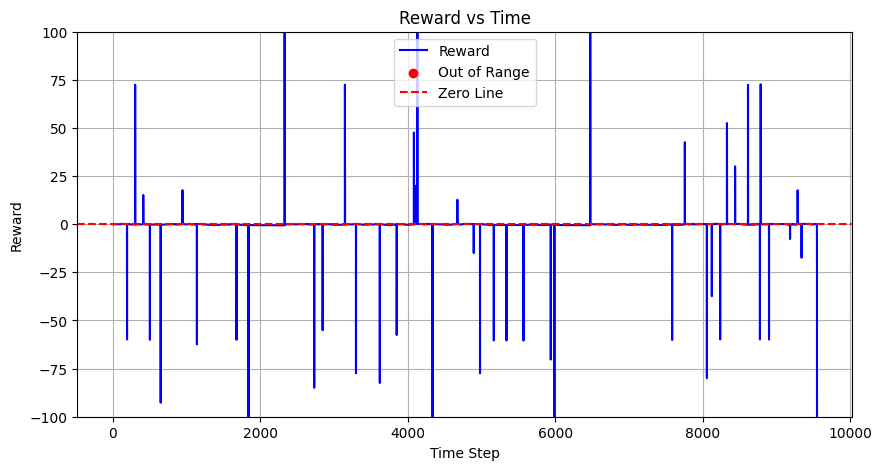

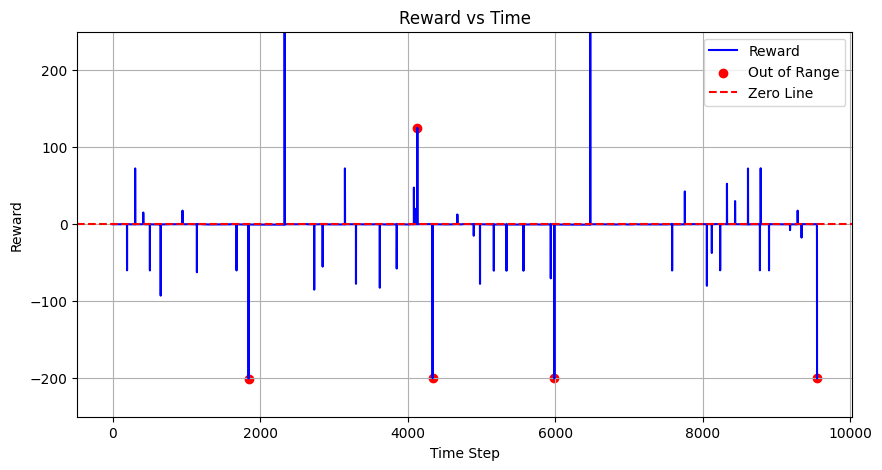

Mean Reward: -0.2609838877817072
Standard Deviation of Reward: 7.309620324438518


In [3]:
for game in range(num_games):
    obs = env.reset()
    done = False
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        rewards.append(reward)
        ##print(reward)
    print("------------------------------------------ game: ", game)
    env.save_video()                #Decir que guarde el video del juego
env.close()

rewards = np.array(rewards)

out_of_range_indices = np.where((rewards > 100) | (rewards < -100))[0]
out_of_range_rewards = rewards[out_of_range_indices]

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Reward', color='blue')
plt.scatter(out_of_range_indices, out_of_range_rewards, color='red', label='Out of Range')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.ylim(-100, 100)
plt.title('Reward vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot rewards vs time
plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Reward', color='blue')
plt.scatter(out_of_range_indices, out_of_range_rewards, color='red', label='Out of Range')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.ylim(-250, 250)
plt.title('Reward vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print statistics
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)
print(f'Mean Reward: {mean_reward}')
print(f'Standard Deviation of Reward: {std_reward}')

In [6]:

# Load the data from the Excel file
file_name = 'data/reward_data/rewards_data_0.xlsx'
data = pd.read_excel(file_name)

# Create the figure for Aggressiveness Signal
fig = go.Figure()

# Plot the aggressiveness signal
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['aggressiveness_signal'],
    mode='lines+markers',
    name='Aggressiveness Signal',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# Add vertical lines for match rewards
for i, reward in enumerate(data['match_reward']):
    if reward != 0:
        color = 'red' if reward < 0 else 'blue'
        fig.add_vline(x=i, line=dict(color=color, dash='dash'))

# Update layout for aggressiveness signal
fig.update_layout(
    title='Aggressiveness Signal Over Steps',
    xaxis_title='Steps',
    yaxis_title='Aggressiveness Signal',
    hovermode='x unified'
)

# Show the figure
fig.show()

# Create the figure for Normal Signal
fig = go.Figure()

# Plot the normal signal
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['normal_signal'],
    mode='lines+markers',
    name='Normal Signal',
    line=dict(color='green'),
    marker=dict(size=5)
))

# Add vertical lines for match rewards
for i, reward in enumerate(data['match_reward']):
    if reward != 0:
        color = 'red' if reward < 0 else 'blue'
        fig.add_vline(x=i, line=dict(color=color, dash='dash'))

# Update layout for normal signal
fig.update_layout(
    title='Normal Signal Over Steps',
    xaxis_title='Steps',
    yaxis_title='Normal Signal',
    hovermode='x unified'
)

# Show the figure
fig.show()

# Create the figure for Distance Reward
fig = go.Figure()

# Plot the distance reward
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['distance_reward'],
    mode='lines+markers',
    name='Distance Reward',
    line=dict(color='purple'),
    marker=dict(size=5)
))

# Add vertical lines for match rewards
for i, reward in enumerate(data['match_reward']):
    if reward != 0:
        color = 'red' if reward < 0 else 'blue'
        fig.add_vline(x=i, line=dict(color=color, dash='dash'))

# Update layout for distance reward
fig.update_layout(
    title='Distance Reward Over Steps',
    xaxis_title='Steps',
    yaxis_title='Distance Reward',
    hovermode='x unified'
)

# Show the figure
fig.show()

# Create the figure for Time Penalty
fig = go.Figure()

# Plot the time penalty
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['time_penalty'],
    mode='lines+markers',
    name='Time Penalty',
    line=dict(color='orange'),
    marker=dict(size=5)
))

# Add vertical lines for match rewards
for i, reward in enumerate(data['match_reward']):
    if reward != 0:
        color = 'red' if reward < 0 else 'blue'
        fig.add_vline(x=i, line=dict(color=color, dash='dash'))

# Update layout for time penalty
fig.update_layout(
    title='Time Penalty Over Steps',
    xaxis_title='Steps',
    yaxis_title='Time Penalty',
    hovermode='x unified'
)

# Show the figure
fig.show()

# Create the figure for Distance Reward and Time Penalty combined
fig = go.Figure()

# Plot distance reward
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['distance_reward'],
    mode='lines',
    name='Distance Reward',
    line=dict(color='purple')
))

# Plot time penalty
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['time_penalty'],
    mode='lines',
    name='Time Penalty',
    line=dict(color='orange')
))

# Add vertical lines for match rewards
for i, reward in enumerate(data['match_reward']):
    if reward != 0:
        color = 'red' if reward < 0 else 'blue'
        fig.add_vline(x=i, line=dict(color=color, dash='dash'))

# Update layout for combined graph
fig.update_layout(
    title='Distance Reward and Time Penalty Over Steps',
    xaxis_title='Steps',
    yaxis_title='Values',
    hovermode='x unified'
)

# Show the figure
fig.show()



In [7]:
# Load the data from the Excel file
file_name = 'data/reward_data/rewards_data_0.xlsx'
data = pd.read_excel(file_name)

# Initialize lists to store the accumulated rewards
accumulated_aggressiveness = []
accumulated_normal = []

# Variables to track the current match and accumulated values
current_match_reward = 0
current_aggressiveness = 0
current_normal = 0

# Iterate over the rows in the DataFrame
for index, row in data.iterrows():
    if row['match_reward'] != 0 or row['done']:
        # If a new match starts, save the accumulated rewards and reset counters
        if index > 0:
            accumulated_aggressiveness.append(current_aggressiveness)
            accumulated_normal.append(current_normal)
        
        # Reset counters for the new match
        current_aggressiveness = 0
        current_normal = 0

    # Accumulate rewards
    current_aggressiveness += row['aggressiveness_signal']
    current_normal += row['normal_signal']

# Append the last match accumulated rewards
accumulated_aggressiveness.append(current_aggressiveness)
accumulated_normal.append(current_normal)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Match': range(1, len(accumulated_aggressiveness) + 1),
    'Accumulated Aggressiveness': accumulated_aggressiveness,
    'Accumulated Normal': accumulated_normal
})

results

,Match,Accumulated Aggressiveness,Accumulated Normal
0,1,-320.295624,-312.5
1,2,-270.525288,632.5
2,3,-707.147418,-762.5
3,4,-0.538965,0.0
